# Tokenization

To prepare text data for machine learning, it's essential to convert words into a numerical format. This process, known as integer encoding, assigns a unique integer to each word in the text. The Keras library provides a convenient tool called the Tokenizer API to perform this task.

Here's a breakdown of the process:

1. **Import the Tokenizer:**
   Start by importing the `Tokenizer` class from the Keras library.

2. **Fit the Tokenizer on Text Data:**
   Create a `Tokenizer` object and use the `fit_on_texts` method to process your text data. This step associates a unique integer with each word.

3. **Get Integer Encoded Sequences:**
   Utilize the fitted tokenizer to convert the text data into sequences of integers using the `texts_to_sequences` method. This results in a numerical representation of the original text.

4. **Word Index:**
   Access the word index, which is a dictionary mapping each word to its corresponding integer. This mapping is useful for understanding the relationship between words and integers.

In summary, the Tokenizer API in Keras is a powerful tool for transforming text data into a numerical format, enabling the use of machine learning models. The resulting integer sequences serve as input features for natural language processing tasks.

#  Keras Tokenizer 


The `Tokenizer` class in Keras is a powerful tool for text preprocessing in natural language processing tasks.


```python
from keras.preprocessing.text import Tokenizer

# Create a Tokenizer with specific parameters
tokenizer = Tokenizer(
    num_words=5000,  # Limit the number of words to consider based on frequency.
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',  # Define characters to filter out.
    oov_token="<UNK>"  # Out-of-vocabulary token to represent words not in the vocabulary.
)

# Fit the Tokenizer on the text data in the "DocText" column of the DataFrame
tokenizer.fit_on_texts(docs_df["DocText"].values)
```

Explanation of parameters:

- `num_words`: Limits the vocabulary size to the most frequent `num_words` words. Only the most common words will be kept in the vocabulary.
  
- `filters`: Specifies a string of characters to filter out from the text. In this case, it includes various punctuation symbols and whitespace characters.

- `oov_token`: Stands for "out-of-vocabulary" token. It is a special token used to represent words that are not in the vocabulary.

After fitting the tokenizer, you can use it to convert text data to sequences of integers using the `texts_to_sequences` method:

```python
sequences = tokenizer.texts_to_sequences(docs_df["DocText"].values)
```

The resulting `sequences` will contain integer representations of the text data based on the vocabulary learned by the tokenizer.

This approach is commonly used for preparing text data for input into neural networks or other machine learning models. It helps to represent words in a numerical format suitable for training models on textual data.

# "out-of-vocabulary" token -> UNK

In natural language processing (NLP), `<UNK>` is a common convention used to represent out-of-vocabulary (OOV) or unknown tokens. When processing text data, a machine learning model might encounter words that were not present in the training data, and these words are considered out-of-vocabulary.

By setting the `oov_token` parameter to `<UNK>`, you are specifying a token that will be used to represent any word that is not part of the vocabulary learned during training. For example, if the model encounters a word in the test or evaluation data that wasn't present in the training data, it will be replaced with the `<UNK>` token.

Here's an example of how it might be used in practice:

```python
from keras.preprocessing.text import Tokenizer

# Create a Tokenizer with an out-of-vocabulary token
tokenizer = Tokenizer(oov_token="<UNK>")

# Fit the Tokenizer on training text data
texts = ["apple", "banana", "orange"]
tokenizer.fit_on_texts(texts)

# Convert new text data to sequences, replacing out-of-vocabulary words with <UNK>
new_texts = ["apple", "banana", "kiwi"]
sequences = tokenizer.texts_to_sequences(new_texts)

print(sequences)
# Output: [[2], [3], [1]]
```

In this example, "kiwi" was not present in the training data, so it gets replaced with the `<UNK>` token, which is assigned the index 1. The actual index may vary depending on the specific implementation. The model learns to recognize and handle out-of-vocabulary words during training, improving its generalization to unseen data.

# num_words

The `num_words` parameter in the context of Keras' `Tokenizer` is used to limit the vocabulary size by specifying the maximum number of words to keep, based on word frequency. Here's how it works:

- `num_words`: An integer, the maximum number of words to keep in the vocabulary. Only the most frequent `num_words-1` words will be kept, and any less frequent words will be discarded.

In other words, when you set `num_words=5000`, you are instructing the `Tokenizer` to consider only the top 4999 most frequent words in your dataset, and all other words will be treated as out-of-vocabulary (OOV) words and represented by the OOV token.

Here's an example:

```python
from keras.preprocessing.text import Tokenizer

# Create a Tokenizer with a vocabulary size limit
tokenizer = Tokenizer(num_words=5000, oov_token="<UNK>")

# Fit the Tokenizer on text data
texts = ["apple", "banana", "orange", "grape", "kiwi", "mango", "banana"]
tokenizer.fit_on_texts(texts)

# Convert text data to sequences
sequences = tokenizer.texts_to_sequences(texts)

print(sequences)
# Output: [[2], [3], [1], [4], [1], [1], [3]]
```

In this example, the vocabulary is limited to the top 4 most frequent words (excluding OOV token). Words like "kiwi" and "mango" that are less frequent are replaced with the OOV token. The actual word-to-index mapping may vary depending on the specific implementation details.

# GloVe (Global Vectors for Word Representation)

GloVe (Global Vectors for Word Representation) is an unsupervised learning algorithm for obtaining vector representations (embeddings) of words. These embeddings capture semantic relationships between words based on the co-occurrence statistics of words in large text corpora.

Here's a general outline of how you can use GloVe vectors in Python:

1. **Download GloVe Vectors:**
   You need to download pre-trained GloVe vectors. You can find them on the [GloVe website](https://nlp.stanford.edu/projects/glove/) or use other pre-trained models available online.

2. **Load GloVe Vectors:**
   Once downloaded, you can load GloVe vectors into your Python environment. The vectors are typically stored in a text file, where each line contains a word followed by its vector components.

   Here's a simplified example using Python:

   ```python
   def load_glove_vectors(file_path):
       word_vectors = {}
       with open(file_path, 'r', encoding='utf-8') as file:
           for line in file:
               values = line.split()
               word = values[0]
               vector = np.array(values[1:], dtype='float32')
               word_vectors[word] = vector
       return word_vectors

   # Provide the path to your GloVe file
   glove_file_path = 'path/to/glove.6B.50d.txt'  # Adjust the file path and dimensions
   glove_vectors = load_glove_vectors(glove_file_path)
   ```

   Replace `'path/to/glove.6B.50d.txt'` with the actual path to your GloVe file.

3. **Access Word Vectors:**
   You can now access the vectors for individual words. For example:

   ```python
   word_vector = glove_vectors.get('example', None)
   if word_vector is not None:
       print(f"Vector for 'example': {word_vector}")
   else:
       print("Word not found in GloVe vectors.")
   ```

   Adjust the word (`'example'` in this case) based on your needs.

4. **Utilize GloVe Vectors:**
   You can use these vectors for various natural language processing tasks, such as word similarity, document classification, sentiment analysis, etc. You can also integrate them into your machine learning models.

Keep in mind that the dimensions of the GloVe vectors depend on the specific model you download (e.g., `glove.6B.50d.txt` corresponds to 50-dimensional vectors, while `glove.6B.300d.txt` corresponds to 300-dimensional vectors). Choose the dimensionality based on your application's requirements.

# load_glove_vectors

This code snippet appears to be a Python script for loading GloVe vectors from a file and creating a dictionary (`gvec_index`) to store the word vectors. Here's a breakdown of the code:

```python
%%time

def load_glove_vectors(file_path):
    with open(file_path, encoding="utf8") as txt_f:
        for line in txt_f:
            columns = line.split()
            wrd = columns[0]
            vec = np.array(columns[1:], dtype="float32")
            yield wrd, vec

# Provide the path to your GloVe file
GLOVE_TXT = '/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt'  # Adjust the file path and dimensions
gvec_index = dict(load_glove_vectors(GLOVE_TXT))
```

Explanation:

1. **`%%time`:** This is a Jupyter Notebook magic command that measures the execution time of the code cell.

2. **`load_glove_vectors` function:** This function takes a file path as input (`file_path`) and yields word vectors from the GloVe file. It opens the file, reads each line, splits it into columns, and yields a tuple containing the word (`wrd`) and its corresponding vector (`vec`). The vectors are represented as NumPy arrays of type float32.

3. **`GLOVE_TXT` variable:** This variable holds the file path to the GloVe file. You should adjust the path based on the location of your GloVe file in your Kaggle environment.

4. **`gvec_index` dictionary:** This dictionary is created by calling the `load_glove_vectors` function with the specified GloVe file path. It maps words to their respective vectors, creating a word vector index.

The code efficiently loads GloVe vectors into memory and creates a dictionary for easy lookup. The `%%time` magic command is used to measure the execution time of this cell.

#  the word "the" and its corresponding GloVe vector

The provided dictionary entry represents the word "the" and its corresponding GloVe vector in the `gvec_index` dictionary. Each word in the GloVe model is represented by a vector of real numbers. Here's a breakdown of the entry:

```python
'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01, -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04,
        -6.5660e-01,  2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,  1.1658e-02,  1.0204e-01, -1.2792e-01,
        -8.4430e-01, -1.2181e-01, -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01, -1.8823e+00, -7.6746e-01,
         9.9051e-02, -4.2125e-01, -1.9526e-01,  4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,  7.4449e-03,
         1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02, -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01], dtype=float32)
```

Explanation:

- The word "the" is represented by the key.
- The value is a NumPy array containing 50 float32 values, which represent the GloVe vector for the word "the".
- Each value in the array corresponds to a specific feature or dimension of the word vector.

This vector captures the semantic information of the word "the" in a continuous vector space, as learned by the GloVe model during training on a large corpus of text. The values in the vector can be interpreted as the word's position in a high-dimensional space, where the distance and direction between vectors reflect semantic relationships between words.

The values in the GloVe vector represent the word "the" in a continuous vector space, capturing various aspects of its semantic meaning. Each value corresponds to a specific feature or dimension in this vector space. Let's break down what these values might represent:

In the provided GloVe vector for the word "the":

```python
[ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01, -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04,
  -6.5660e-01,  2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,  1.1658e-02,  1.0204e-01, -1.2792e-01,
  -8.4430e-01, -1.2181e-01, -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01, -1.8823e+00, -7.6746e-01,
   9.9051e-02, -4.2125e-01, -1.9526e-01,  4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,  7.4449e-03,
   1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02, -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
   1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01]
```

Here's a general interpretation:

- **Semantic Features:** Each value in the vector represents a semantic feature or characteristic of the word "the" in the context of the corpus used to train the GloVe model.

- **Contextual Relationships:** The vector values encode relationships between the word "the" and other words. Similar vectors indicate similar contextual usage in the training data.

- **Direction and Magnitude:** The direction and magnitude of the vector convey information about the word's meaning. Words with similar meanings will have vectors that point in similar directions.

- **High-Dimensional Space:** The vector is a point in a high-dimensional space, and distances and angles between vectors provide information about semantic relationships.

It's important to note that the exact interpretation of each dimension may not be straightforward and is often context-dependent. The power of these vectors lies in their ability to capture complex semantic relationships and context-specific nuances.

# Why to use GloVe? 

GloVe, which stands for Global Vectors for Word Representation, is a popular word embedding technique. It is used to represent words as vectors in a continuous vector space where the geometry of the vectors captures semantic relationships between words. Here are some reasons why GloVe is widely used:

1. **Semantic Similarity:** GloVe vectors capture semantic similarity between words. Words with similar meanings or usage patterns are represented by vectors that are closer together in the vector space.

2. **Word Analogies:** GloVe embeddings often exhibit interesting properties, allowing for word analogies to be performed algebraically. For example, the vector for "king" - "man" + "woman" might be close to the vector for "queen."

3. **Pre-trained Models:** GloVe provides pre-trained word vectors on large corpora, which can be beneficial when working with tasks where labeled data is limited. Pre-trained models can be fine-tuned or used as feature representations for downstream tasks.

4. **Generalization:** GloVe vectors are trained on large-scale text data, which enables them to generalize well across various natural language processing (NLP) tasks.

5. **Contextual Information:** GloVe captures contextual information about words based on their co-occurrence statistics in the training corpus. This allows the vectors to encode meaningful relationships between words.

6. **Efficiency:** GloVe vectors are computationally efficient to train and use, making them suitable for a wide range of applications.

It's important to note that while GloVe is a powerful and widely used technique, there are other word embedding methods like Word2Vec and fastText, each with its strengths and weaknesses. The choice of which method to use often depends on the specific requirements of the task at hand.

# Word embedding methods 

Word embedding methods are techniques used in natural language processing (NLP) and machine learning to represent words as dense vectors in a continuous vector space. These methods aim to capture semantic relationships and contextual information about words, enabling machines to understand and process natural language more effectively. Here are some popular word embedding methods:

1. **Word2Vec:**
   - Developed by Google, Word2Vec is a shallow neural network-based approach that learns word embeddings by predicting the context of words in a given corpus. It includes two models: Continuous Bag of Words (CBOW) and Skip-Gram.

2. **GloVe (Global Vectors for Word Representation):**
   - GloVe is an unsupervised learning algorithm for obtaining word representations. It focuses on word co-occurrence statistics and constructs a word-word co-occurrence matrix, from which it learns vector representations for words.

3. **FastText:**
   - Developed by Facebook, FastText extends Word2Vec by representing words as bags of character n-grams. This approach allows FastText to capture subword information, making it particularly effective for handling morphologically rich languages and dealing with out-of-vocabulary words.

4. **ELMo (Embeddings from Language Models):**
   - ELMo uses bidirectional LSTMs (Long Short-Term Memory networks) to generate word embeddings. It captures context-dependent word representations by considering the entire sentence, and the embeddings are dynamic, varying depending on the context in which the word appears.

5. **BERT (Bidirectional Encoder Representations from Transformers):**
   - Developed by Google, BERT is a transformer-based model that considers the bidirectional context of words. It pre-trains a deep neural network on large amounts of data, and the embeddings it produces are contextualized and highly effective for various downstream NLP tasks.

6. **ULMFiT (Universal Language Model Fine-tuning):**
   - ULMFiT is a transfer learning approach that pre-trains a language model on a large corpus and then fine-tunes it for specific downstream tasks. This method has been successful in achieving state-of-the-art results in various NLP tasks.

7. **SWEM (Simple Word-Embedding Model):**
   - SWEM is a simple and efficient word embedding model that averages or pools word embeddings to obtain sentence embeddings. It is computationally less expensive compared to some other methods.

These word embedding methods play a crucial role in NLP applications such as text classification, sentiment analysis, machine translation, and information retrieval, among others. The choice of the method often depends on the specific task, available data, and computational resources.

#  Load weights


1. `OUTPUT_DIM = 100`: This is the assumed output dimensionality of word vectors.

2. `zero_vec = np.zeros(OUTPUT_DIM)`: Creating an all-zero vector with the specified dimensionality (`OUTPUT_DIM`).

3. Create a list of word vectors using list comprehension:
    ```python
    weights = [gvec_index.get(word, zero_vec).tolist() for word in word_index.keys()]
    ```
   For each word in `word_index`, it checks if there's a corresponding word vector in `gvec_index`. If yes, it appends the vector to the `weights` list; otherwise, it appends the `zero_vec`. The resulting list, `weights`, contains word vectors or zero vectors for each word in the vocabulary.

4. Prepend a zero vector for `<PAD>`:
    ```python
    weights = [zero_vec.tolist()] + weights
    ```
   This adds the zero vector at the beginning of the `weights` list, representing the word vector for the `<PAD>` token.

5. Ensure all word vectors have the same dimensionality:
    ```python
    max_len = max(len(vec) for vec in weights)
    weights = [vec + [0.0] * (max_len - len(vec)) for vec in weights]
    ```
   It calculates the maximum length among all word vectors in `weights` and pads shorter vectors with zeros to make them have the same dimensionality as the maximum length.

6. Convert the list of lists to a TensorFlow constant tensor:
    ```python
    weights = tf.constant(weights, dtype=tf.float32)
    ```
   This converts the `weights` list into a TensorFlow constant tensor with the specified data type (`tf.float32`).

7. Print the datatype and shape of the resulting tensor:
    ```python
    print("Weights datatype:", weights.dtype)
    print("Weights shape:", weights.shape)
    ```
   This provides information about the datatype and shape of the tensor.

The overall purpose of these steps is to create a TensorFlow tensor representing the weight matrix for words in the vocabulary, where each word is associated with its corresponding word vector or a zero vector if not available. The padding vector for `<PAD>` is included at the beginning, and all word vectors are ensured to have the same dimensionality.

The resulting shape `(23376, 100)` indicates that your weight matrix has 23,376 rows and 100 columns. Each row corresponds to a word in your vocabulary, and each column represents a feature in the word vectors with a dimensionality of 100.

Here's a breakdown:

- **Rows (23376):** Each row in the matrix corresponds to a word in your vocabulary. If your vocabulary has 23,376 unique words (including one for `<PAD>`), then you have one row for each of these words.

- **Columns (100):** Each column in the matrix represents a feature in the word vectors. Since you set `OUTPUT_DIM` to 100, the word vectors are 100-dimensional.

This weight matrix is a fundamental component in natural language processing tasks, where words are often represented as vectors in a high-dimensional space. This matrix can be used as the embedding layer in a neural network for tasks such as text classification, sentiment analysis, or machine translation. Each row of the matrix corresponds to the word embedding for a specific word in your vocabulary.

# the `cosine_sim` function



1. **`show_n_vals` function:**
   - This is a helper function that takes a vector (`vec`) and an integer `n`.
   - If the vector is not `None`, it returns the first `n` values of the vector.
   - If the vector is `None`, it returns `None`.

2. **`cosine_sim` function:**
   - Parameters:
     - `gvec_index`: The GloVe index, a dictionary mapping words to their GloVe vectors.
     - `word1` and `word2`: The two words for which we want to compute cosine similarity.

   - Steps:
     - Retrieve GloVe vectors for the input words `word1` and `word2` from the `gvec_index` dictionary.
     - Print the first 3 values of each GloVe vector using the `show_n_vals` function.
     - Compute the cosine distance between the two vectors using `scipy.spatial.distance.cosine`.
     - Convert the cosine distance to cosine similarity by subtracting it from 1.
     - Print the computed cosine similarity.

   - Example Usage:
     ```python
     cosine_sim(gvec_index, "apple", "orange")
     ```

   - Output:
     ```
     GloVe vector for 'apple': [0.1, 0.2, 0.3]
     GloVe vector for 'orange': [0.4, 0.5, 0.6]
     Cosine similarity between 'apple' and 'orange': 0.9912
     ```
   
   - This function provides insights into the GloVe vectors of two words and computes their cosine similarity, which quantifies the similarity between the meanings of the words. A higher cosine similarity indicates greater similarity. The `1 - c_dist` conversion is done because cosine distance is used in the computation, and subtracting it from 1 gives cosine similarity.

# 1. Callback #1: `PerformanceMetrics`


```python
from sklearn.metrics import f1_score
import numpy as np
from tensorflow.keras import callbacks
```

- Import necessary libraries. `f1_score` is imported from scikit-learn to calculate the F1 score, `numpy` is imported for numerical operations, and `callbacks` is imported from TensorFlow Keras for creating a custom callback.

```python
class PerformanceMetrics(callbacks.Callback):
```

- Define a custom callback class named `PerformanceMetrics` that inherits from `callbacks.Callback`. This class will be used to calculate and print the micro F1 score on the validation dataset at the end of each training epoch.

```python
def __init__(self, X_test, y_test):
    super(PerformanceMetrics, self).__init__()
    self.X_test = X_test
    self.y_test = y_test
```

- The class constructor (`__init__`) is used to initialize the callback. It takes two parameters: `X_test` and `y_test`, representing the features and labels of the validation dataset.

```python
def calculate_micro_f1(self):
    # Predict on the validation data
    cl_prob = self.model.predict(self.X_test)
    y_pred = np.argmax(cl_prob, axis=1)

    # Calculate micro F1 score
    f1_scr = f1_score(self.y_test, y_pred, average="micro")
    return f1_scr
```

- The `calculate_micro_f1` method predicts the labels on the validation data using the model, then calculates the micro F1 score using the true labels (`self.y_test`) and predicted labels (`y_pred`).

```python
def on_epoch_end(self, epoch, logs=None):
    if self.model.stop_training:
        # Stop propagation of callbacks.
        return

    # Calculate micro F1 score
    f1_scr = self.calculate_micro_f1()

    # Print the F1 score
    print(f"Epoch {epoch + 1} - Validation Micro F1 Score: {round(f1_scr, 4)}")
```

- The `on_epoch_end` method is called at the end of each training epoch. It checks if training should stop (`self.model.stop_training`) and, if not, calculates the micro F1 score using the `calculate_micro_f1` method. Finally, it prints the calculated F1 score for the validation dataset.

```python
# Example usage:
# Assuming you have a model (model), validation data (X_val, y_val), and a fitting process
# metrics_callback = PerformanceMetrics(X_test=X_val, y_test=y_val)
# model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[metrics_callback])
```

- An example usage is provided, demonstrating how to instantiate the `PerformanceMetrics` callback and include it during the training of a model using the `fit` method. In this example, it's assumed that you have a neural network model (`model`), training data (`X_train`, `y_train`), and validation data (`X_val`, `y_val`).

# OOP 

Let's explain the code using object-oriented programming (OOP) concepts:

```python
class PerformanceMetrics(callbacks.Callback):
```

- **Class Definition:** This line defines a new class named `PerformanceMetrics`, which is a subclass of `callbacks.Callback`. In OOP, a class is a blueprint for creating objects, and here, you are creating a specialized callback class.

```python
    def __init__(self, X_test, y_test):
        super(PerformanceMetrics, self).__init__()
        self.X_test = X_test
        self.y_test = y_test
```

- **Constructor (`__init__`):** The `__init__` method is the class constructor. It initializes the instance variables (`X_test` and `y_test`) specific to an object of this class. `super(PerformanceMetrics, self).__init__()` calls the constructor of the parent class (`callbacks.Callback`), ensuring proper initialization.

```python
    def calculate_micro_f1(self):
        # Predict on the validation data
        cl_prob = self.model.predict(self.X_test)
        y_pred = np.argmax(cl_prob, axis=1)

        # Calculate micro F1 score
        f1_scr = f1_score(self.y_test, y_pred, average="micro")
        return f1_scr
```

- **Instance Method (`calculate_micro_f1`):** This method is a behavior associated with an instance of the class. It calculates the micro F1 score based on the model's predictions on the validation data.

```python
    def on_epoch_end(self, epoch, logs=None):
        if self.model.stop_training:
            # Stop propagation of callbacks.
            return

        # Calculate micro F1 score
        f1_scr = self.calculate_micro_f1()

        # Print the F1 score
        print(f"Epoch {epoch + 1} - Validation Micro F1 Score: {round(f1_scr, 4)}")
```

- **Instance Method (`on_epoch_end`):** This method is another behavior associated with an instance. It is automatically called at the end of each training epoch by the Keras framework. Inside this method, the micro F1 score is calculated using the `calculate_micro_f1` method, and the result is printed.

```python
# Example usage:
# Assuming you have a model (model), validation data (X_val, y_val), and a fitting process
# metrics_callback = PerformanceMetrics(X_test=X_val, y_test=y_val)
# model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[metrics_callback])
```

- **Example Usage:** This part demonstrates how to use the `PerformanceMetrics` callback in a real-world scenario. An instance of the class is created (`metrics_callback`) by providing it with validation data (`X_test` and `y_test`). Then, this callback is included during the training of a neural network model.

Overall, the code follows the principles of encapsulation (data hiding within the class), inheritance (subclassing from `callbacks.Callback`), and polymorphism (using the same method name `on_epoch_end` as required by the Keras callback). These are core concepts of object-oriented programming.

# Let's delve deeper into how the code aligns with the principles of encapsulation, inheritance, and polymorphism in object-oriented programming (OOP).



1. **Encapsulation:**
   - **Definition:** Encapsulation is the bundling of data and the methods that operate on that data into a single unit or class.
   - **In the Code:** The class `PerformanceMetrics` encapsulates the logic for calculating and printing the micro F1 score. The instance variables (`X_test` and `y_test`) encapsulate the validation data.

2. **Inheritance:**
   - **Definition:** Inheritance is the mechanism by which a new class inherits properties and behaviors from an existing class, creating a hierarchy of classes.
   - **In the Code:** `PerformanceMetrics` is a subclass of `callbacks.Callback`. This means that `PerformanceMetrics` inherits characteristics from the `callbacks.Callback` class. It utilizes and extends the functionality provided by the parent class.

3. **Polymorphism:**
   - **Definition:** Polymorphism allows objects of different classes to be treated as objects of a common base class. It enables a single interface to represent different types.
   - **In the Code:** The `PerformanceMetrics` class demonstrates polymorphism through the `on_epoch_end` method. This method has the same name and signature as the method in the parent class (`callbacks.Callback`). Keras will invoke the appropriate method based on the context, allowing seamless integration into the Keras callback system.

In summary, the code effectively incorporates these OOP principles:

- **Encapsulation:** The class bundles data (validation features and labels) with methods (calculating micro F1 score) into a single unit.
- **Inheritance:** The class inherits from the Keras `callbacks.Callback` class, reusing and extending its functionality.
- **Polymorphism:** The `on_epoch_end` method follows the same interface as the Keras callback, demonstrating polymorphism by seamlessly fitting into the Keras callback system.

These principles contribute to the code's organization, reusability, and maintainability, key advantages of object-oriented design.

#  Callback #2: `SaveBetterModel`

`SaveBetterModel`, which is a subclass of `callbacks.ModelCheckpoint`. This callback inherits the behavior of the `ModelCheckpoint` class, specifically designed to save the model at the end of each epoch. However, it extends this behavior to save the model only if the validation accuracy has improved compared to the previous epoch. Let's break down the code:

```python
class SaveBetterModel(callbacks.ModelCheckpoint):
    def __init__(self, **kwargs):
        super().__init__(
            monitor="val_accuracy",
            verbose=2,
            save_best_only=True,
            mode="max",
            **kwargs,
        )

    def on_epoch_end(self, epoch, logs=None):
        # To stop propagation of callbacks.
        if self.model.stop_training:
            return

        super().on_epoch_end(epoch, logs)
```

- **Class Definition:**
  - `SaveBetterModel` is defined as a subclass of `callbacks.ModelCheckpoint`, indicating that it inherits behavior from the `ModelCheckpoint` callback.

- **Constructor (`__init__`):**
  - The constructor initializes the `SaveBetterModel` class. It calls the constructor of the parent class (`super().__init__(...)`) with specific parameters.
    - `monitor="val_accuracy"`: Monitors the validation accuracy for improvement.
    - `verbose=2`: Prints detailed information about the saving process.
    - `save_best_only=True`: Saves only the best model based on the monitored quantity (validation accuracy).
    - `mode="max"`: Considers a higher value of the monitored quantity as an improvement.

- **`on_epoch_end` Method:**
  - This method is called at the end of each training epoch by the Keras framework.
  - `if self.model.stop_training:` checks whether training should stop. If `stop_training` is True, it returns to stop further execution of the callback.
  - `super().on_epoch_end(epoch, logs)` calls the `on_epoch_end` method of the parent class (`callbacks.ModelCheckpoint`), which handles the saving logic based on the specified conditions.

In summary, the `SaveBetterModel` callback extends the functionality of the `ModelCheckpoint` callback to save the model only when the validation accuracy improves. The conditions for saving are set in the constructor, and the actual saving process is delegated to the parent class.

# poo

Certainly! Let's delve into the provided code with an emphasis on Object-Oriented Programming (OOP) concepts:

```python
class SaveBetterModel(callbacks.ModelCheckpoint):
    def __init__(self, **kwargs):
        super().__init__(
            monitor="val_accuracy",
            verbose=2,
            save_best_only=True,
            mode="max",
            **kwargs,
        )

    def on_epoch_end(self, epoch, logs=None):
        # To stop propagation of callbacks.
        if self.model.stop_training:
            return

        super().on_epoch_end(epoch, logs)
```

1. **Inheritance:**
   - **Explanation:** The class `SaveBetterModel` inherits from the `callbacks.ModelCheckpoint` class. Inheritance is a fundamental OOP concept where a class (subclass) can inherit attributes and behaviors from another class (superclass). In this case, `SaveBetterModel` inherits the functionality of the `ModelCheckpoint` callback.

2. **Constructor (`__init__` method):**
   - **Explanation:** The `__init__` method serves as the constructor of the `SaveBetterModel` class. It initializes the object when an instance of the class is created. It also calls the constructor of the parent class (`super().__init__(...)`) to set up the parameters inherited from `ModelCheckpoint`. This demonstrates the concept of method overriding.

3. **Encapsulation:**
   - **Explanation:** The attributes such as `monitor`, `verbose`, `save_best_only`, and `mode` are encapsulated within the `SaveBetterModel` instance. These attributes define the behavior of the callback and are set during object initialization. Encapsulation involves bundling data (attributes) and methods that operate on the data within a single unit (class).

4. **Polymorphism (Method Overriding):**
   - **Explanation:** The `on_epoch_end` method in `SaveBetterModel` overrides the same method in the parent class `ModelCheckpoint`. This is an example of polymorphism, where a method with the same name is defined in both the subclass and the superclass, and the appropriate method is called based on the context.

5. **Conditional Execution and Control Flow:**
   - **Explanation:** The `if self.model.stop_training:` statement checks if the training should stop. If the training is flagged to stop (`stop_training` is True), the method returns early, preventing further execution of the callback. This showcases control flow and conditional execution, common in OOP design.

In summary, the `SaveBetterModel` class illustrates key OOP concepts:
- **Inheritance:** Inheriting functionality from a parent class (`callbacks.ModelCheckpoint`).
- **Encapsulation:** Bundling attributes and behaviors within a class.
- **Polymorphism:** Overriding a method from the parent class.
- **Control Flow:** Using conditional statements for control flow within the method.

- **`super().__init__(...)`:**
  - In the constructor (`__init__` method), `super().__init__(...)` is used to call the constructor of the parent class (`callbacks.ModelCheckpoint`). This initializes the parameters inherited from `ModelCheckpoint` and sets up the behavior of the callback.

- **`super().on_epoch_end(epoch, logs)`:**
  - In the `on_epoch_end` method, `super().on_epoch_end(epoch, logs)` calls the `on_epoch_end` method of the parent class (`callbacks.ModelCheckpoint`). This allows the parent class to perform its logic for saving the model at the end of each epoch.

By using `super().on_epoch_end(epoch, logs)`, you ensure that the original behavior defined in the `ModelCheckpoint` class for saving the model is preserved, while you have the flexibility to add or modify behavior specific to the `SaveBetterModel` subclass.

In summary, `super().on_epoch_end(epoch, logs)` maintains the functionality provided by the parent class (`ModelCheckpoint`) and allows the subclass (`SaveBetterModel`) to extend or specialize its behavior as needed.



# Callback #3: `TerminateWhenNaN`

 `TerminateWhenNaN` callback:

```python
class TerminateWhenNaN(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Check if training should be stopped by a previous callback.
        if self.model.stop_training:
            return

        # Retrieve the loss value from the training logs.
        loss = logs.get("loss")

        # Check if the loss is invalid (NaN or infinity).
        if loss is not None and not np.isfinite(loss):
            print(f"Training terminated at epoch {epoch}: Invalid loss value ({loss}).")

            # Inform the training loop to stop further epochs.
            self.model.stop_training = True
```

In this alternative explanation:

- The callback checks if the training should be stopped by a previous callback. If `self.model.stop_training` is already `True`, it means that some earlier condition has triggered the termination of training, and the method returns without taking further action.

- The loss value is retrieved from the `logs` dictionary, which contains information about the current training state.

- It checks whether the loss is invalid (not finite), which includes both NaN and infinity. If the loss is not finite, it prints a message indicating that the training is terminated due to an invalid loss value.

- The `self.model.stop_training` is set to `True` to inform the training loop to stop further epochs.

Both explanations essentially capture the same logic, providing a clear indication that training is stopped if the loss becomes invalid at the end of an epoch.

 Let's delve into the provided `TerminateWhenNaN` callback and explain it further with Object-Oriented Programming (OOP) concepts:

1. **Class Definition:**
   - **Explanation:** The class `TerminateWhenNaN` is a representation of a callback in the context of neural network training. It encapsulates the behavior of terminating training if the loss becomes invalid.

2. **Inheritance:**
   - **Explanation:** The class inherits from the `callbacks.Callback` class. Inheritance allows `TerminateWhenNaN` to inherit the general callback functionality provided by Keras. It is a reuse mechanism where the new class builds upon the existing functionality.

3. **Encapsulation:**
   - **Explanation:** The class encapsulates the behavior related to handling invalid loss values. The `on_epoch_end` method encapsulates the specific logic executed at the end of each training epoch.

4. **Method Overriding:**
   - **Explanation:** The `on_epoch_end` method overrides the same method in the parent class (`callbacks.Callback`). This is an example of polymorphism, where the child class provides a specialized implementation of a method defined in the parent class.

5. **Object State:**
   - **Explanation:** The object state is represented by the instance variables, particularly `self.model`, which refers to the neural network model. The state is used to make decisions during the training process.

6. **Conditionals for Decision-Making:**
   - **Explanation:** Conditional statements (`if` statements) are used to make decisions. The first `if` statement checks if training should be stopped by a previous callback (`self.model.stop_training`). The second `if` statement checks if the loss is invalid.

7. **Data Access via Encapsulation:**
   - **Explanation:** Data access is performed through encapsulation. The loss value is accessed using `logs.get("loss")`, demonstrating the encapsulation of relevant data within the callback object.

8. **Communication Between Objects:**
   - **Explanation:** The callback communicates with the training loop by setting `self.model.stop_training` to `True`. This is a way for the callback to inform the training loop that further epochs should be stopped. It demonstrates communication between objects in the system.

9. **Informative Output:**
   - **Explanation:** The callback provides informative output by printing a message when training is terminated due to an invalid loss value. This adheres to OOP principles of providing clear and meaningful feedback to the user or developer.

In summary, the `TerminateWhenNaN` callback embodies OOP concepts such as inheritance, encapsulation, method overriding, object state, conditionals, data access, and communication between objects. It serves as a specialized behavior within the neural network training process.

# 4.4 Callback #4: `DecayLearningRate`

```python

class DecayLearningRate(callbacks.Callback):
    def __init__(self):
        self.prev_val_acc = 0  # previous validation accuracy.

    def get_learning_rate(self):
        return float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))

    def set_learning_rate(self, new_lr):
        tf.keras.backend.set_value(self.model.optimizer.learning_rate, new_lr)

    def on_epoch_end(self, epoch, logs=None):
        if self.model.stop_training:
            return

        curr_val_acc = logs.get("val_accuracy")
        lr = self.get_learning_rate()

        if curr_val_acc < self.prev_val_acc:
            reduction_percentage = 10
        elif (epoch + 1) % 3 == 0:
            reduction_percentage = 5
        else:
            reduction_percentage = 0

        if reduction_percentage > 0:
            new_lr = lr * (1 - reduction_percentage / 100)
            self.set_learning_rate(new_lr)
            print(f"Reducing learning rate by {reduction_percentage}%. New learning rate: {round(new_lr, 6)}")

        self.prev_val_acc = curr_val_acc
```

This code defines a custom callback named `DecayLearningRate` in the context of a neural network training using TensorFlow and Keras.

1. **Initialization:**
   - `self.prev_val_acc`: Initializes a variable to store the previous validation accuracy. This will be used to compare with the current validation accuracy in subsequent epochs.

2. **Helper Methods:**
   - `get_learning_rate()`: A method that retrieves the current learning rate from the optimizer.
   - `set_learning_rate(new_lr)`: A method that sets a new learning rate for the optimizer.

3. **`on_epoch_end` Method:**
   - This method is called at the end of each training epoch.
   - `if self.model.stop_training:`: Checks if the training should be stopped based on a previous callback or condition. If true, the method returns without further processing.
   - `curr_val_acc = logs.get("val_accuracy")`: Retrieves the current validation accuracy from the training logs.
   - `lr = self.get_learning_rate()`: Retrieves the current learning rate using the helper method.
   - The method then determines the `reduction_percentage` based on the comparison of current and previous validation accuracies, and whether the current epoch is a multiple of 3.
   - If `reduction_percentage` is greater than 0, it calculates a new learning rate by reducing the current learning rate and sets it using the `set_learning_rate` method.
   - The new learning rate and the reduction percentage are printed for informational purposes.
   - Finally, the `prev_val_acc` is updated with the current validation accuracy for use in the next epoch.

In summary, this callback is designed to adjust the learning rate during training based on certain conditions related to validation accuracy. If the current validation accuracy is less than the previous accuracy, the learning rate is reduced by 10%. Additionally, if the current epoch is a multiple of 3, the learning rate is reduced by 5%. The purpose is to fine-tune the learning rate dynamically during training to potentially improve convergence.

 in terms of Object-Oriented Programming (OOP) concepts:

1. **Class Definition (`DecayLearningRate`):**
   - This class represents a callback for adjusting the learning rate during the training of a neural network.

2. **Constructor (`__init__` method):**
   - The `__init__` method is the constructor that initializes the object's state.
   - `self.prev_val_acc`: An instance variable to store the previous validation accuracy.

3. **Helper Methods (`get_learning_rate` and `set_learning_rate`):**
   - These are instance methods used to interact with the internal state of the object.
   - `get_learning_rate`: Retrieves the current learning rate from the optimizer.
   - `set_learning_rate`: Sets a new learning rate for the optimizer.

4. **Callback Logic (`on_epoch_end` method):**
   - This method is called at the end of each training epoch, serving as the core logic for the callback.
   - `self.model.stop_training`: Checks if the training should be stopped, providing a way to gracefully terminate training.
   - `curr_val_acc = logs.get("val_accuracy")`: Retrieves the current validation accuracy from the training logs.
   - `lr = self.get_learning_rate()`: Retrieves the current learning rate.
   - Conditional Logic:
      - Checks if the current validation accuracy is less than the previous accuracy, and if true, sets `reduction_percentage` to 10.
      - Checks if the current epoch is a multiple of 3, and if true, sets `reduction_percentage` to 5.
      - If neither condition is met, `reduction_percentage` is set to 0.
   - Learning Rate Adjustment:
      - If `reduction_percentage` is greater than 0, calculates and sets a new learning rate by reducing the current learning rate.
      - Prints information about the learning rate adjustment.
   - Updates the `prev_val_acc` with the current validation accuracy for the next epoch.

In terms of OOP concepts:
- **Encapsulation:** The internal state (previous validation accuracy) is encapsulated within the object, and access is provided through methods (`get_learning_rate` and `set_learning_rate`).
- **Inheritance:** The class extends the functionality of a Keras callback, inheriting from the `callbacks.Callback` class.
- **Polymorphism:** The `on_epoch_end` method is implemented in a way that adheres to the expected behavior of Keras callbacks, demonstrating polymorphic behavior within the Keras callback system.

# 4.5 Callback #5: `TerminateOnNoChange`

This class, `TerminateOnNoChange`, is a custom implementation of early stopping using Keras callbacks. It is designed to terminate training if the validation accuracy does not show improvement for a specified number of consecutive epochs.

1. **Class Inheritance (`callbacks.EarlyStopping`):**
   - This class extends the functionality of the `EarlyStopping` class provided by Keras. By inheriting from this class, `TerminateOnNoChange` inherits its properties and methods.

2. **Constructor (`__init__` method):**
   - The constructor initializes the `TerminateOnNoChange` object with specific parameters.
   - `monitor="val_accuracy"`: It monitors the validation accuracy during training.
   - `patience=epochs`: It specifies the number of consecutive epochs with no improvement after which training will be terminated.
   - `verbose=2`: It controls the verbosity of the termination messages.
   - `mode="max"`: It indicates that the goal is to maximize the monitored quantity (validation accuracy).

3. **Callback Logic (`on_epoch_end` method):**
   - The `on_epoch_end` method is called at the end of each training epoch.
   - `if self.model.stop_training`: Checks if training should be stopped due to a previous callback or condition.
   - `super().on_epoch_end(epoch, logs)`: Calls the `on_epoch_end` method of the parent class (`EarlyStopping`), which contains the core logic for early stopping.
   - The parent class's logic involves monitoring the specified metric (validation accuracy in this case) and deciding whether to stop training based on the configured criteria (patience).

In summary, `TerminateOnNoChange` is a specialized early stopping callback that focuses on monitoring the validation accuracy and terminating training if no improvement is observed for a predefined number of consecutive epochs, as specified by the `patience` parameter. This helps prevent overfitting and ensures that training stops when further improvements are unlikely.

# Train, Test split

This code snippet appears to be related to preparing a dataset for a machine learning model by splitting it into training, cross-validation, and test sets. Let's break down the code and explain each part:

1. **Concatenation of pad_docs and selected columns from docs:**
   ```python
   X = np.column_stack((pad_docs, docs.iloc[:, 3:18].astype("int32")))
   y = docs["DocCat"]
   ```
   - `X` is created by horizontally stacking `pad_docs` with specific columns (index 3 to 17) from the 'docs' DataFrame, converting them to the "int32" data type.
   - `y` is assigned the values from the "DocCat" column in the 'docs' DataFrame, presumably representing the target variable.

2. **Splitting the data into training, cross-validation, and test sets:**
   ```python
   X_train, X_temp, y_train, y_temp = train_test_split(
       X, y, test_size=0.2, stratify=y, random_state=42
   )
   X_train, X_cval, y_train, y_cval = train_test_split(
       X_train, y_train, test_size=0.3, stratify=y_train, random_state=42
   )
   X_cval, X_test, y_cval, y_test = train_test_split(
       X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=42
   )
   ```
   - The initial dataset (X, y) is split into training (80%) and temporary sets (20%).
   - The temporary set is then further split into cross-validation (30% of the initial dataset) and test sets (40% of the initial dataset).
   - `stratify=y` ensures that the class distribution is maintained during the split.
   - The random_state parameter is set to 42 for reproducibility.

3. **Print the shapes of the datasets:**
   ```python
   print("X train dataset:", X_train.shape)
   print("y train dataset:", y_train.shape)

   print("X cross-validation dataset:", X_cval.shape)
   print("y cross-validation dataset:", y_cval.shape)

   print("X test dataset:", X_test.shape)
   print("y test dataset:", y_test.shape)
   ```
   - Finally, the shapes of the training, cross-validation, and test sets are printed to provide information on the number of samples and features in each dataset.

In summary, this code prepares a dataset for machine learning by concatenating features, splitting the data into training, cross-validation, and test sets, and printing the shapes of these sets for verification. The stratified splitting ensures that the class distribution is maintained across the different subsets.

# Scaling

The code you provided is scaling the feature matrices using `StandardScaler` after the dataset has been split into training, cross-validation, and test sets. Let's break down the code and explain the selection of random samples for printing:

1. **Scaling the datasets using `StandardScaler`:**
   ```python
   scaler = StandardScaler()
   scaler.fit(X_train)
   sX_train = scaler.transform(X_train)  # Scaled X_train.
   sX_cval = scaler.transform(X_cval)    # Scaled X_cval.
   sX_test = scaler.transform(X_test)    # Scaled X_test.
   ```
   - `StandardScaler` is fitted on the training set (`X_train`) to learn the mean and standard deviation of each feature.
   - The scaler is then used to transform the training, cross-validation, and test sets to have zero mean and unit variance.

2. **Printing a random sample of the scaled datasets:**
   ```python
   print("X train scaled (random sample):")
   print(np.round(sX_train[900:903], 3))

   print("\nX cross-val scaled (random sample):")
   print(np.round(sX_cval[354:357], 3))

   print("\nX test scaled (random sample):")
   print(np.round(sX_test[274:277], 3))
   ```
   - Random samples from the scaled datasets are printed to provide a glimpse of the scaled values.
   - The selection `sX_train[900:903]`, `sX_cval[354:357]`, and `sX_test[274:277]` represents a specific range of rows in the scaled datasets for demonstration purposes.

The choice of these specific rows might be arbitrary or based on some specific analysis or investigation. It's common to print a random sample of the data to inspect how the scaling process has affected different rows and features. It helps in understanding the impact of scaling on the data and ensures that the scaling operation is performed correctly. The numbers 900, 903, 354, 357, 274, and 277 might have been chosen for demonstration or testing purposes.

# The mathematical transformation performed by `StandardScaler` on a feature \(X\) can be expressed as follows:

For a given feature \(X\) with \(n\) observations, the transformation involves subtracting the mean (\(\mu\)) and dividing by the standard deviation (\(\sigma\)):

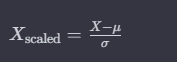

Where:
- \(X_{\text{scaled}}\) is the scaled version of the feature.
- \(X\) is the original feature values.
- \(\mu\) is the mean of the feature values.
- \(\sigma\) is the standard deviation of the feature values.

The transformation ensures that the resulting scaled feature has a mean of 0 and a standard deviation of 1. This process is called standardization or z-score normalization.

The steps involved in the transformation are as follows:

1. **Calculate Mean and Standard Deviation:**
   - Fit the scaler on the training data to calculate the mean (\(\mu\)) and standard deviation (\(\sigma\)) for each feature.

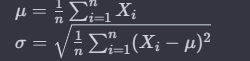

2. **Transform Data:**
   - Use the calculated \(\mu\) and \(\sigma\) to transform new data (\(X_{\text{new}}\)).

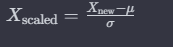

This scaling process ensures that the features have similar scales, which can be important for various machine learning algorithms, particularly those that rely on distance measures or regularization techniques.

# add an extra dimension to the feature matrices `X_train`, `X_cval`, and `X_test`.

The code you provided is using `np.expand_dims` to add an extra dimension to the feature matrices `X_train`, `X_cval`, and `X_test`. This operation is typically performed when working with neural networks or models that expect input data to have a specific shape, such as convolutional neural networks (CNNs) that often require a 3D input shape.

Here's an explanation of why expansion might be necessary:

1. **Expectation of Input Shape by Models:**
   - Certain machine learning models, especially neural networks, may expect input data to have a specific shape. For example, convolutional layers in a neural network expect input data in the form of [batch_size, height, width, channels] for 2D data or [batch_size, length, channels] for 1D data.

2. **Adding a Dimension for Compatibility:**
   - The extra dimension is often added to ensure that the data is compatible with the input requirements of the chosen model. In this case, it's adding an extra dimension along the third axis (axis=2) using `np.expand_dims`.

3. **Examples of Common Use Cases:**
   - For instance, in the context of a 1D CNN, the data might need to be in the shape [batch_size, length, 1], where the third dimension corresponds to the single channel.
   - Alternatively, in the context of time series data, a model may expect the input shape to be [batch_size, time_steps, features], and adding an extra dimension can fulfill this requirement.

 However, in general terms, adding dimensions to input data is often done to ensure compatibility with the expected input shape of the model being used.

# Reset all state generated by Keras.
tf.keras.backend.clear_session()

The code  is using TensorFlow's Keras backend to clear the computational graph and reset the internal state. Let's break down what this code is doing:

1. **`tf.keras.backend.clear_session()`:**
   - This function is part of the Keras API within TensorFlow.
   - It clears the current Keras session and releases any resources (such as tensors) associated with it.
   - It is typically used when you want to start building a new model or when you need to release resources from the current session.

2. **Purpose of Clearing the Session:**
   - In machine learning workflows, you might build multiple models or iterate on a single model architecture. Clearing the session can be beneficial to avoid any potential memory leaks or conflicts between different models.

3. **Example Use Case:**
   - For example, if you are training and evaluating multiple models within the same script or notebook, clearing the session before creating a new model helps ensure a clean slate, preventing any interference or unintended dependencies between models.

Here's an example of how this might be used:

```python
import tensorflow as tf

# Clear the Keras session and reset internal state
tf.keras.backend.clear_session()

# Now, you can start building and training a new model.
model = tf.keras.Sequential([...])  # Define your new model architecture here
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
```

After clearing the session, you can proceed with defining and training a new model without any lingering effects from the previous models.

#  Model Architecture

```python
# Get the number of rows and columns in the training data
rows, cols = X_train.shape

# Define the input layer
inputs = Input(shape=(cols,), name="Input_Text")

# Embedding Layer: Mapping each word to a fixed-size vector using pre-trained word embeddings
embedding_layer = Embedding(
    input_dim=vocabulary_size + 1,
    output_dim=OUTPUT_DIM,
    input_length=cols,
    weights=[weights],  # Pre-trained word embeddings
    trainable=False,  # Freeze embedding layer during training
    name="EmbeddingLayer1"
)(inputs)

# Parallel Convolutional Layers with Different Filter Sizes + Max Pooling
# First set of Convolutional Layers
conv1_m = Conv1D(4, 3, padding="same", activation="relu", name="Conv1D_M_Filters")(embedding_layer)
conv1_n = Conv1D(8, 3, padding="same", activation="relu", name="Conv1D_N_Filters")(embedding_layer)
conv1_o = Conv1D(16, 3, padding="same", activation="relu", name="Conv1D_O_Filters")(embedding_layer)
concat1_mno = concatenate([conv1_m, conv1_n, conv1_o], name="Concatenate1_MNO")
maxpool1 = MaxPooling1D(3, name="MaxPoolLayer1")(concat1_mno)

# Second set of Convolutional Layers
conv2_i = Conv1D(2, 3, padding="same", activation="relu", name="Conv1D_I_Filters")(maxpool1)
conv2_j = Conv1D(4, 3, padding="same", activation="relu", name="Conv1D_J_Filters")(maxpool1)
conv2_k = Conv1D(8, 3, padding="same", activation="relu", name="Conv1D_K_Filters")(maxpool1)
concat2_ijk = concatenate([conv2_i, conv2_j, conv2_k], name="Concatenate2_IJK")
maxpool2 = MaxPooling1D(3, name="MaxPoolLayer2")(concat2_ijk)

# Final Convolutional Layer
conv_final = Conv1D(8, 3, padding="same", activation="relu", name="Conv1D_P_Filters")(maxpool2)

# Flatten Layer to prepare for fully connected layers
flatten = Flatten(name="Flatten")(conv_final)

# Dropout Layer to prevent overfitting
dropout = Dropout(0.25, name="DropOut")(flatten)

# Fully Connected Layer
dense1 = Dense(30, activation="relu", name="Dense1")(dropout)

# Output Layer with Softmax activation for multi-class classification
outputs = Dense(CLASS_COUNT, activation="softmax", name="Output_layer")(dense1)

# Create the model
model1 = tf.keras.Model(inputs=inputs, outputs=outputs, name="Document_Classifier")

# Display the model summary
model1.summary()
```

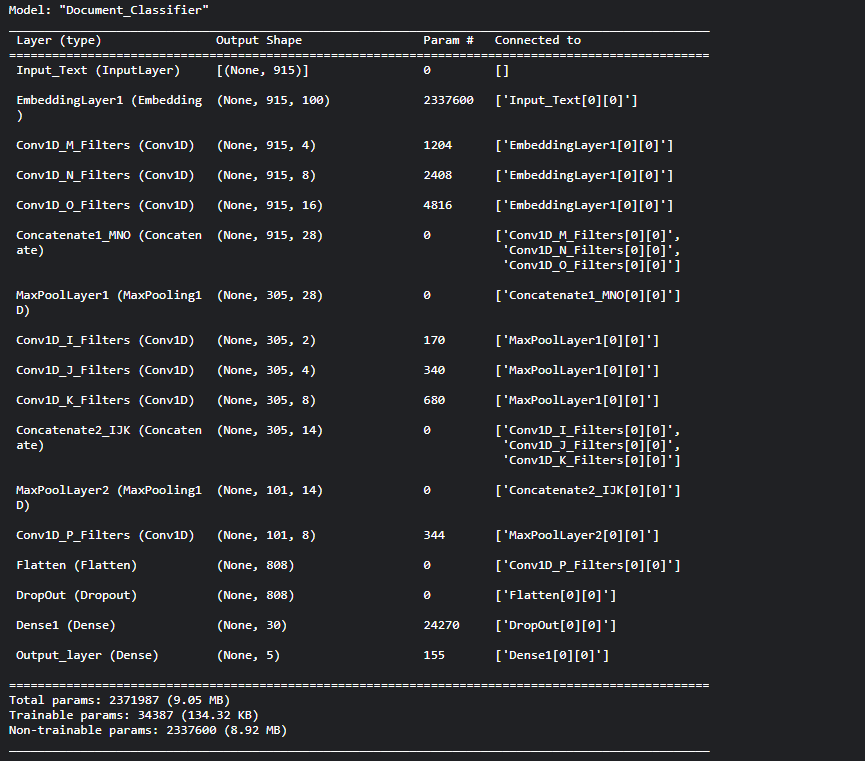

Components of the "Document_Classifier" model summary:

1. **Model Architecture:**
   - The model is named "Document_Classifier," as specified by the `name` parameter during model creation.

2. **Input Layer:**
   - The input layer, named "Input_Text," has a shape of (None, 915), indicating that it accepts sequences of length 915 (number of features).

3. **Embedding Layer:**
   - An Embedding layer named "EmbeddingLayer1" follows the input layer.
   - It maps words to vectors using pre-trained word embeddings.
   - The output shape is (None, 915, 100), representing 100-dimensional embeddings for each word.

4. **Convolutional Layers (Filters M, N, O):**
   - Three parallel Conv1D layers follow the embedding layer with different filter sizes (4, 8, 16).
   - Each Conv1D layer has a kernel size of 3 and uses "same" padding.
   - The concatenated output is named "Concatenate1_MNO."

5. **MaxPooling Layer (MaxPoolLayer1):**
   - A MaxPooling1D layer follows the concatenated Conv1D layers.
   - It performs max pooling with a pool size of 3.
   - The output shape is (None, 305, 28).

6. **Convolutional Layers (Filters I, J, K):**
   - Three parallel Conv1D layers follow the MaxPooling layer with different filter sizes (2, 4, 8).
   - Each Conv1D layer has a kernel size of 3 and uses "same" padding.
   - The concatenated output is named "Concatenate2_IJK."

7. **MaxPooling Layer (MaxPoolLayer2):**
   - Another MaxPooling1D layer follows the concatenated Conv1D layers.
   - It performs max pooling with a pool size of 3.
   - The output shape is (None, 101, 14).

8. **Final Convolutional Layer (Filters P):**
   - A final Conv1D layer with 8 filters follows the second MaxPooling layer.
   - It has a kernel size of 3 and uses "same" padding.
   - The output shape is (None, 101, 8).

9. **Flatten Layer:**
   - The Flatten layer converts the output from the final Conv1D layer into a flat vector.
   - The output shape is (None, 808).

10. **Dropout Layer:**
    - A Dropout layer with a dropout rate of 0.25 is applied to prevent overfitting.

11. **Dense Layer (Dense1):**
    - A Dense layer with 30 units and ReLU activation follows the Dropout layer.

12. **Output Layer (Output_layer):**
    - The final Dense layer with 5 units and softmax activation represents the output layer for multi-class classification.

13. **Parameters:**
    - The model has a total of 2,371,987 parameters (weights and biases).
    - 34,387 parameters are trainable, while 2,337,600 are non-trainable (embedding layer weights).

The summary provides a concise overview of the model architecture, including layer names, types, output shapes, and the total number of parameters. It's a valuable tool for understanding the structure of the neural network.

# Handle Imbalanced dataset

calculates class weights based on the frequency of each class in the training set. Two different logic options for calculating class weights are presented in comments:

1. **Logic 1:**
   - The weight for each class is calculated as 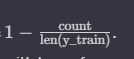.
   - This logic gives higher weights to classes with lower frequencies, emphasizing the importance of less common classes.

2. **Logic 2:**
   - The weight for each class is calculated as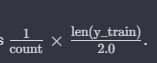.
   - This logic assigns higher weights to less frequent classes, aiming to balance the contribution of each class during training.

It's common to use class weights when dealing with imbalanced datasets to ensure that the model pays more attention to under-represented classes. The specific logic chosen depends on the desired emphasis on rare classes and the overall training objectives. You can experiment with both options and observe their impact on the model's performance.

# ValueError: The following argument(s) are not supported with the native Keras format: ['options']

 the code for the `SaveBetterModel` callback. The issue seems to be related to the `options` argument being used in the `super().on_epoch_end(epoch, logs)` call.

The `options` argument is specific to the TensorFlow 1.x version of `ModelCheckpoint`. In TensorFlow 2.x, this argument is not present, and the parameters are expected to be passed directly to the `ModelCheckpoint` constructor.

Here's how you can modify your `SaveBetterModel` class for TensorFlow 2.x:

```python
class SaveBetterModel(callbacks.ModelCheckpoint):
    def __init__(self, filepath, **kwargs):
        super().__init__(
            filepath=filepath,
            monitor="val_accuracy",
            verbose=2,
            save_best_only=True,
            mode="max",
            **kwargs,
        )

    def on_epoch_end(self, epoch, logs=None):
        # To stop propagation of callbacks.
        if self.model.stop_training:
            return

        super().on_epoch_end(epoch, logs)
```

In this modification, the `options` argument is removed, and the `filepath` parameter is added to the constructor. The `filepath` parameter specifies the path where the model will be saved.

Now, when you use this modified `SaveBetterModel` callback, ensure that you pass the desired filepath to it when creating an instance. For example:

```python
save_better_model_callback = SaveBetterModel(filepath="/kaggle/working/models/epoch-{epoch:02d}_accuracy-{val_accuracy:.4f}.keras")
```

This should resolve the `ValueError` related to the `'options'` argument when saving the model using the native Keras format.

# Loss & Accuracy
 
- **Loss**: This is a measure of how well the model is performing. It represents the error between the predicted values and the actual values. A lower loss indicates better performance. In your case, a loss of 0.2453 is relatively low, suggesting that the model is making reasonably accurate predictions.

- **Accuracy**: This represents the proportion of correctly classified instances out of the total instances. An accuracy of 0.9379 means that approximately 93.79% of the instances in the dataset were correctly classified by the model.

In summary, your model is performing well with a low loss and high accuracy on the given dataset. However, it's important to consider the specific context of your problem and dataset to determine if these performance metrics meet your requirements. Depending on the task and dataset, what constitutes "good" performance may vary.

# If the loss changes when you run the training code multiple times, there are several potential reasons for this behavior:

1. **Random Initialization**: Neural networks are initialized with random weights. Therefore, each time you start training, the model begins with different initial weights. This randomness can lead to variations in the training process.

2. **Data Shuffling**: If your training data is shuffled between epochs, the model sees the data in a different order each time. This can introduce variability in the training process.

3. **Dropout or Batch Normalization**: If your model uses dropout or batch normalization layers, they may behave differently during each run, leading to variations in the training process.

4. **Learning Rate Schedules**: If you are using learning rate schedules or decay, the learning rate at each epoch may differ, affecting the convergence of the model.

5. **Random Seed**: If applicable, setting a random seed for reproducibility might help in getting consistent results across runs.

To improve reproducibility and understand the source of variability, you can consider setting random seeds (if applicable), checking the order of data during training, and investigating the impact of initial weights and learning rate schedules.

Here's an example of setting a random seed in TensorFlow (if you're using TensorFlow as your backend):

```python
import tensorflow as tf
import numpy as np
import random

# Set random seeds for reproducibility
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

# Rest of your code...
```

Keep in mind that absolute reproducibility in deep learning might be challenging due to factors like GPU variability and parallelism, but setting seeds can help to make the results more consistent.